Task - Use appropriate ML Algorithms to solve the problem of Diamond Price Prediction. You can use inbuilt libraries in order to solve this problem. Use Jupyter Notebook or Google Colaboratory for this assignment.
Kindly follow the steps mentioned below.

Step - 1: Load the data
Step - 2: Perform the EDA on the given dataset
Step - 3: Handle Categorical Columns i.e. convert them to numerical representation 
Step - 4: Normalise the data
Step - 5: Split the data - Test and Train (recommended 75:25 split)
Step - 6: Apply  the ML Algorithms 
Step - 7: Evaluate your model
Step - 8: Compare the different models and display the results.

Importing the packages

In [50]:
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt

import numpy as np

import warnings

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

import os

Loading the given diamonds dataset

In [3]:
df=pd.read_csv(r'C:\Users\nihaal\Downloads\1374928-diamonds_dataset_and_description\diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Printing all the column name 

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Checking if any null values is present in the dataset

In [5]:
df.isnull().values.any()

False

PERFORMING EDA ON THE GIVEN DATASET

1) Checking the information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


2) Checking the shape of the given dataset

In [7]:
df.shape

(53940, 10)

3) Printing the 1st 5 of the given dataset

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


4) Printing the last 5 elements of the given dataset

In [9]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


5) Checking for unique values in "cut" , "color" , "clarity" column

In [10]:
print(df['cut'].unique().tolist())
print(df['color'].unique().tolist())
print(df['clarity'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the above data we can tell that there are few null datas.
So we check the dimensions(x,y,z) which has null value .

In [12]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [13]:
print('Length : ',len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]))

Length :  20


Now we replace the null values with NAN and drop them from the dataset

In [14]:
df[['x','y','z']]=df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)

In [15]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


Printing the Heatmap for the dataset

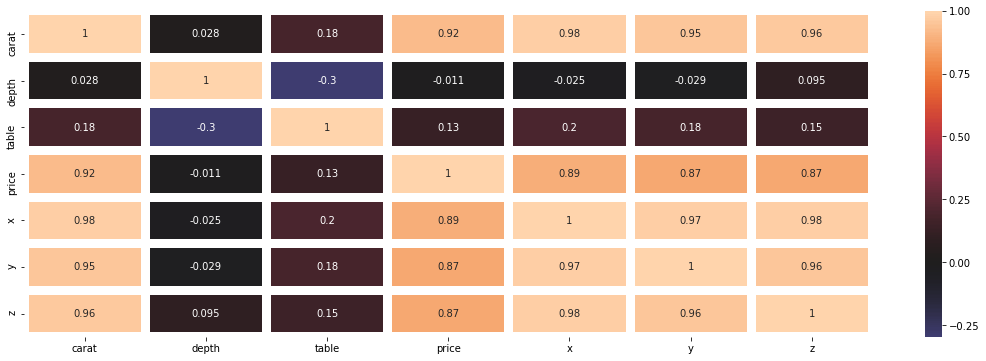

In [16]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0,ax=ax)

Printing the boxplot for the above data , we compare each feature with price

1)First we compare the price and the color. 

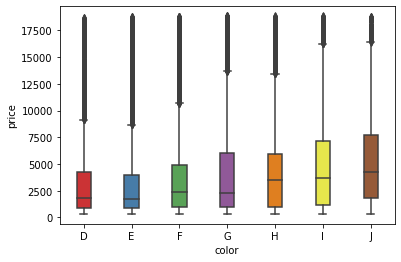

In [18]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

From the above plot, we can see that he colors "G, H, I and J" has less number of outliers compared to the colors " D and E". It suggests that the 4 colors(G,H,I,J) are of better quality .

2)Now we compare the price and cut columns.

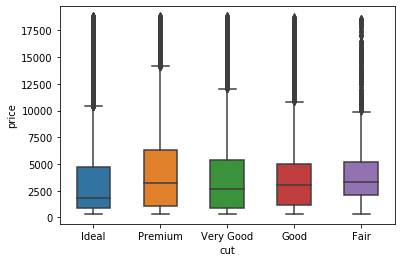

In [19]:
sns.boxplot(x='cut',y='price',data=df,order=['Ideal','Premium' ,'Very Good' ,'Good' ,'Fair'],width=0.5)

From the above plot, we can see that for lower the quality of cut,the number of outliers is more except for the Ideal cut type.

3)Now we compare the price and clarity columns.

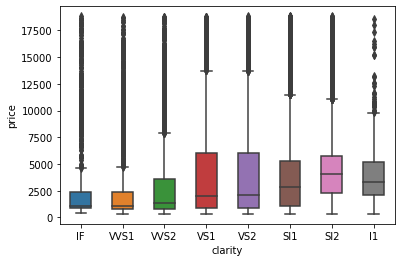

In [21]:
sns.boxplot(x='clarity',y='price',data=df,width =0.5,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

From the above plot, we can see that clarity values " IF, VVS1 and VVS2 " have a high number of outliers compared to other categories of color.

4)Now we compare clarity and cut columns.

We convert the categorical data columns "clarity,color,cut" into numerical data columns by assigninng each of the data a numerical value and creating new columns with the resulting data.

In [26]:
df['cut_score'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['clarity_score']=df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


In [29]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score,cut_score
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3,7,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,7,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2,3,4
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,2,7,5


In [38]:
data_score = df.copy()

In [41]:
X=DataFrame(data_score,columns =['carat','cut_score','color_score','clarity_score','depth','table','x','y','z'])
Y=DataFrame(data_score,columns =['price'])

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=10)

In [45]:
scale = StandardScaler()
X_train = DataFrame(scale.fit_transform(X_train[['carat','cut_score','color_score','clarity_score','depth','table','x','y','z']]),columns=['carat','cut_score','color_score','clarity_score','depth','table','x','y','z'],index=X_train.index)
X_test = DataFrame(scale.transform (X_test[['carat','cut_score','color_score','clarity_score','depth','table','x','y','z']]),columns=['carat','cut_score','color_score','clarity_score','depth','table','x','y','z'],index=X_test.index)
print(X_train.head())

          carat  cut_score  color_score  clarity_score     depth     table  \
13164  0.936508   0.980354     0.933030      -1.243016 -1.784781 -1.094669   
18798  1.571154  -0.812141    -2.005121      -0.029161  0.665990  1.136924   
3150   0.259552   0.980354    -2.005121       0.577767  0.455924 -0.648351   
51400 -0.121236   0.084106     1.520661      -0.636088 -1.574715  1.136924   
207   -0.586644   0.980354     0.345400       1.791621 -0.314318 -1.094669   

              x         y         z  
13164  1.179584  1.135701  0.893800  
18798  1.438970  1.433730  1.517883  
3150   0.446146  0.399395  0.482472  
51400  0.195704  0.127663 -0.028142  
207   -0.484068 -0.450863 -0.496204  


In [48]:
#Linear Regression
dlin = LinearRegression()
dlin.fit(X_train, Y_train)
y_pred = dlin.predict(X_test)
print(' Linear Regression ')
print('Score : %.4f' % dlin.score(X_test, Y_test))
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('R2     : %0.2f ' % r2)
n=X_test.shape[0]
p=X_test.shape[1]
adj_rsquared = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

 Linear Regression 
Score : 0.9070

MSE    : 1506823.54 
R2     : 0.91 
Adjusted R Squared: 0.906947444114294


In [49]:
#Linear Regression wih Polynomial feature
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

y_test_predict = poly_model.predict(X_test_poly)

r2_pr =poly_model.score(X_test_poly, Y_test)

print('  Polynomial Regression ')
print('Test R2 Score : %.4f' % r2_pr)


mse_pr = mean_squared_error(Y_test, y_test_predict)
rmse_pr = mean_squared_error(Y_test, y_test_predict)**0.5
r2 = r2_score(Y_test, y_test_predict)

print('')
print('MSE    : %0.2f ' % mse_pr)
print('RMSE   : %0.2f ' % rmse_pr)
print('Actual-Predicted R2 Score     : %0.2f ' % r2)

n=X_test.shape[0]
p=X_test.shape[1]


ar2_pr = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(ar2_pr))


  Polynomial Regression 
Test R2 Score : 0.8775

MSE    : 1984557.73 
RMSE   : 1408.74 
Actual-Predicted R2 Score     : 0.88 
Adjusted R Squared: 0.8774453919140442


The goal of our analysis was to analysing the given Diamond Dataset and after in-depth analysis, 
we came to know that the features that affect the price of a diamond when applied to our model are 
carat, cut, color, clarity, depth %, table % and length to width ratio. Our model has an accuracy of 90 %.